<a href="https://colab.research.google.com/github/atul527/DataScience/blob/main/Tax_payer_submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

tax_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/tax_payers/train_set_label.csv" )
tax_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803 entries, 0 to 802
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      803 non-null    int64 
 1   HHI             803 non-null    int64 
 2   HHDL            803 non-null    int64 
 3   Married         803 non-null    int64 
 4   CollegGrads     803 non-null    int64 
 5   AHHAge          803 non-null    int64 
 6   Cars            803 non-null    int64 
 7   Filed in 2017   803 non-null    int64 
 8   Filed in 2016   803 non-null    int64 
 9   Filed in 2015   803 non-null    int64 
 10  PoliticalParty  803 non-null    object
dtypes: int64(10), object(1)
memory usage: 69.1+ KB


In [2]:
tax_data.head()

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015,PoliticalParty
0,61,183414,-12402,1,2,28,1,0,0,1,Democrat
1,501,129786,700251,2,5,63,3,0,0,0,Republican
2,658,268343,493411,2,4,44,1,1,0,1,Independent
3,703,290506,-433408,1,1,28,5,1,0,1,Republican
4,702,90108,907135,1,3,57,5,1,1,0,Democrat


In [3]:
tax_data_cleaned = tax_data.drop('Unnamed: 0', axis = 1)

In [4]:
tax_data_cleaned.head()

,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015,PoliticalParty
0,183414,-12402,1,2,28,1,0,0,1,Democrat
1,129786,700251,2,5,63,3,0,0,0,Republican
2,268343,493411,2,4,44,1,1,0,1,Independent
3,290506,-433408,1,1,28,5,1,0,1,Republican
4,90108,907135,1,3,57,5,1,1,0,Democrat


In [5]:
dummies = pd.get_dummies(tax_data_cleaned['Married'])
dummies.head()

,0,1,2
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [6]:
dummies.rename(columns = {0 : 'Married_0', 1 : 'Married_1', 2 : 'Married_2'}, inplace = True)

In [7]:
dummies.head()

,Married_0,Married_1,Married_2
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [8]:
tax_data_encoded = tax_data_cleaned.join(dummies)
tax_data_encoded.head()

,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015,PoliticalParty,Married_0,Married_1,Married_2
0,183414,-12402,1,2,28,1,0,0,1,Democrat,0,1,0
1,129786,700251,2,5,63,3,0,0,0,Republican,0,0,1
2,268343,493411,2,4,44,1,1,0,1,Independent,0,0,1
3,290506,-433408,1,1,28,5,1,0,1,Republican,0,1,0
4,90108,907135,1,3,57,5,1,1,0,Democrat,0,1,0


In [9]:
tax_data_final = tax_data_encoded.drop('Married', axis = 1)
tax_data_final.head()

,HHI,HHDL,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015,PoliticalParty,Married_0,Married_1,Married_2
0,183414,-12402,2,28,1,0,0,1,Democrat,0,1,0
1,129786,700251,5,63,3,0,0,0,Republican,0,0,1
2,268343,493411,4,44,1,1,0,1,Independent,0,0,1
3,290506,-433408,1,28,5,1,0,1,Republican,0,1,0
4,90108,907135,3,57,5,1,1,0,Democrat,0,1,0


In [10]:
tax_data_final['HHI']=(tax_data_final['HHI']-tax_data_final['HHI'].min())/(tax_data_final['HHI'].max()-tax_data_final['HHI'].min())

In [11]:
tax_data_final['HHDL']=(tax_data_final['HHDL']-tax_data_final['HHDL'].min())/(tax_data_final['HHDL'].max()-tax_data_final['HHDL'].min())
tax_data_final['CollegGrads']=(tax_data_final['CollegGrads']-tax_data_final['CollegGrads'].min())/(tax_data_final['CollegGrads'].max()-tax_data_final['CollegGrads'].min())
tax_data_final['AHHAge']=(tax_data_final['AHHAge']-tax_data_final['AHHAge'].min())/(tax_data_final['AHHAge'].max()-tax_data_final['AHHAge'].min())
tax_data_final['Cars']=(tax_data_final['Cars']-tax_data_final['Cars'].min())/(tax_data_final['Cars'].max()-tax_data_final['Cars'].min())

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
cols = tax_data_final.columns
X = tax_data_final[cols]
X = X.drop('PoliticalParty', axis = 1)
y = tax_data_final['PoliticalParty']
print(X.head())
print(y.head())
y.value_counts()

        HHI      HHDL  CollegGrads    AHHAge  Cars  Filed in 2017  \
0  0.612419  0.493889          0.4  0.114943   0.2              0   
1  0.433174  0.850283          1.0  0.517241   0.6              0   
2  0.896283  0.746844          0.8  0.298851   0.2              1   
3  0.970360  0.283347          0.2  0.114943   1.0              1   
4  0.300556  0.953745          0.6  0.448276   1.0              1   

   Filed in 2016  Filed in 2015  Married_0  Married_1  Married_2  
0              0              1          0          1          0  
1              0              0          0          0          1  
2              0              1          0          0          1  
3              0              1          0          1          0  
4              1              0          0          1          0  
0       Democrat
1     Republican
2    Independent
3     Republican
4       Democrat
Name: PoliticalParty, dtype: object


Democrat       269
Independent    269
Republican     265
Name: PoliticalParty, dtype: int64

In [14]:
y.replace(['Democrat', 'Republican', 'Independent'], [0, 1, 2], inplace = True)
y.head()

0    0
1    1
2    2
3    1
4    0
Name: PoliticalParty, dtype: int64

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [16]:
print(X_train.head())
print(X_test.head())
print(y_train.head())
print(y_test.head())

          HHI      HHDL  CollegGrads    AHHAge  Cars  Filed in 2017  \
309  0.797730  0.297228          1.0  0.218391   0.4              0   
433  0.092617  0.903741          1.0  0.287356   0.6              1   
613  0.120409  0.286740          0.8  0.287356   0.4              1   
108  0.155664  0.123452          0.0  0.321839   0.4              1   
800  0.170063  0.049875          0.2  0.563218   0.8              0   

     Filed in 2016  Filed in 2015  Married_0  Married_1  Married_2  
309              1              0          0          1          0  
433              0              1          1          0          0  
613              0              1          0          1          0  
108              0              0          0          1          0  
800              0              0          0          1          0  
          HHI      HHDL  CollegGrads    AHHAge  Cars  Filed in 2017  \
8    0.513873  0.747328          0.4  0.252874   0.0              0   
790  0.893335  0.

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [50]:
model = DecisionTreeClassifier(max_depth = 10, random_state = 1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [51]:
print(accuracy_score(y_train, model.predict(X_train)))
print(accuracy_score(y_test, y_pred))

0.7274143302180686
0.37888198757763975


In [52]:
model = DecisionTreeClassifier(max_depth = 10, random_state = 1)
model.fit(X, y)
y_pred = model.predict(X)
print(accuracy_score(y, y_pred))

0.7658779576587795


In [93]:
a = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/tax_payers/test_set_label.csv')
a.head()

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015
0,17,253274,-633752,2,1,94,3,0,1,1
1,590,47107,322850,0,1,30,2,1,1,0
2,224,111874,300583,0,2,46,3,0,1,1
3,960,96670,107419,0,3,77,5,0,0,0
4,57,128669,341273,0,0,92,4,1,1,1


In [94]:
ac = a.drop('Unnamed: 0', axis = 1)

In [95]:
d = pd.get_dummies(ac['Married'])
d.rename(columns = {0 : 'Married_0', 1 : 'Married_1', 2 : 'Married_2'}, inplace = True)
ae = ac.join(dummies)

In [96]:
af = ae.drop('Married', axis = 1)

In [97]:
af['HHI']=(af['HHI']-tax_data_encoded['HHI'].min())/(tax_data_encoded['HHI'].max()-tax_data_encoded['HHI'].min())
af['HHDL']=(af['HHDL']-tax_data_encoded['HHDL'].min())/(tax_data_encoded['HHDL'].max()-tax_data_encoded['HHDL'].min())
af['CollegGrads']=(af['CollegGrads']-tax_data_encoded['CollegGrads'].min())/(tax_data_encoded['CollegGrads'].max()-tax_data_encoded['CollegGrads'].min())
af['AHHAge']=(af['AHHAge']-tax_data_encoded['AHHAge'].min())/(tax_data_encoded['AHHAge'].max()-tax_data_encoded['AHHAge'].min())
af['Cars']=(af['Cars']-tax_data_encoded['Cars'].min())/(tax_data_encoded['Cars'].max()-tax_data_encoded['Cars'].min())

In [98]:
af.head()

,HHI,HHDL,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015,Married_0,Married_1,Married_2
0,0.845917,0.183156,0.2,0.873563,0.6,0,1,1,0,1,0
1,0.156831,0.661547,0.2,0.137931,0.4,1,1,0,0,0,1
2,0.373306,0.650411,0.4,0.321839,0.6,0,1,1,0,0,1
3,0.322488,0.553811,0.6,0.678161,1.0,0,0,0,0,1,0
4,0.429441,0.670760,0.0,0.850575,0.8,1,1,1,0,1,0


In [99]:
y_final = model.predict(af)

In [102]:
res = pd.DataFrame(y_final) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = af.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]
res.head()

,prediction
0,0
1,1
2,0
3,2
4,0


In [103]:
res.replace( [0, 1, 2], ['Democrat', 'Republican', 'Independent'], inplace = True)
res.head()

,prediction
0,Democrat
1,Republican
2,Democrat
3,Independent
4,Democrat


In [105]:
# To download the csv file locally
from google.colab import files
res.to_csv('prediction_results.csv', index = False)         
files.download('prediction_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
y = a.Price
features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']
X = a[features]
X.describe()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
count,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.576340,471.006940,-37.807904,144.990201
std,0.971079,0.711362,897.449881,0.075850,0.099165
min,1.000000,1.000000,0.000000,-38.164920,144.542370
25%,2.000000,1.000000,152.000000,-37.855438,144.926198
50%,3.000000,1.000000,373.000000,-37.802250,144.995800
75%,4.000000,2.000000,628.000000,-37.758200,145.052700
max,8.000000,8.000000,37000.000000,-37.457090,145.526350


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Define model. Specify a number for random_state to ensure same results each run
a_model = DecisionTreeRegressor(random_state=1)

# Fit model
a_model.fit(X, y)

DecisionTreeRegressor(random_state=1)

In [ ]:
print(a_model.predict(X.head()))
print(y.head())

[1035000. 1465000. 1600000. 1876000. 1636000.]
0    1035000.0
1    1465000.0
2    1600000.0
3    1876000.0
4    1636000.0
Name: Price, dtype: float64


In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
a = pd.read_csv("https://raw.githubusercontent.com/atul527/DataScience/main/Standard%20Metropolitan%20Areas%20Data%20-%20train_data%20-%20data.csv")
a.head()

,land_area,percent_city,percent_senior,physicians,hospital_beds,graduates,work_force,income,region,crime_rate
0,1384,78.1,12.3,25627,69678,50.1,4083.9,72100,1,75.55
1,3719,43.9,9.4,13326,43292,53.9,3305.9,54542,2,56.03
2,3553,37.4,10.7,9724,33731,50.6,2066.3,33216,1,41.32
3,3916,29.9,8.8,6402,24167,52.2,1966.7,32906,2,67.38
4,2480,31.5,10.5,8502,16751,66.1,1514.5,26573,4,80.19


In [ ]:
a.describe()

,land_area,percent_city,percent_senior,physicians,hospital_beds,graduates,work_force,income,region,crime_rate
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,2615.727273,42.518182,9.781818,1828.333333,6345.868687,54.463636,449.366667,6762.505051,2.494949,55.643030
std,3045.826210,17.348277,2.524547,3192.199763,9136.202716,7.773286,610.990885,10393.349660,1.013921,13.470943
min,47.000000,13.400000,3.900000,140.000000,481.000000,30.300000,66.900000,769.000000,1.000000,23.320000
25%,1408.000000,30.100000,8.350000,459.000000,2390.000000,50.250000,150.300000,2003.000000,2.000000,46.115000
50%,1951.000000,39.500000,9.700000,774.000000,3472.000000,54.000000,257.200000,3510.000000,3.000000,56.060000
75%,2890.500000,52.600000,10.750000,1911.500000,6386.500000,58.300000,436.500000,6283.500000,3.000000,63.860000
max,27293.000000,100.000000,21.800000,25627.000000,69678.000000,72.800000,4083.900000,72100.000000,4.000000,85.620000


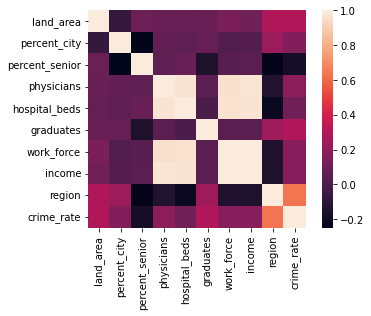

In [ ]:
sns.heatmap(a.corr(), square = True, vmax = 1)

In [ ]:
a1 = a
a1 = a1.drop('percent_senior', axis = 1)
X1 = a1[a1.columns[0:-1]]
y1 = a1['crime_rate']

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 1)

In [ ]:
m1 = DecisionTreeRegressor(random_state = 1, max_depth = 3, criterion = "poisson")
m1.fit(X1_train, y1_train)

DecisionTreeRegressor(criterion='poisson', max_depth=3, random_state=1)

In [ ]:
mean_squared_error(y1_test, m1.predict(X1_test))

81.48681322498177

In [ ]:
cols = a.columns
cols = cols[0:-1]
print(cols)
X = a[cols]
y = a['crime_rate']

Index(['land_area', 'percent_city', 'percent_senior', 'physicians',
       'hospital_beds', 'graduates', 'work_force', 'income', 'region'],
      dtype='object')


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:
m = DecisionTreeRegressor(random_state = 1, criterion = "poisson")
m.fit(X_train, y_train)
mean_squared_error(y_test, m.predict(X_test))

128.36689